In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
df=pd.read_csv('train.csv')

In [ ]:
Phân tích mối quan hệ giữa tuổi và khả năng sóng sót

Mising value in Age: 177


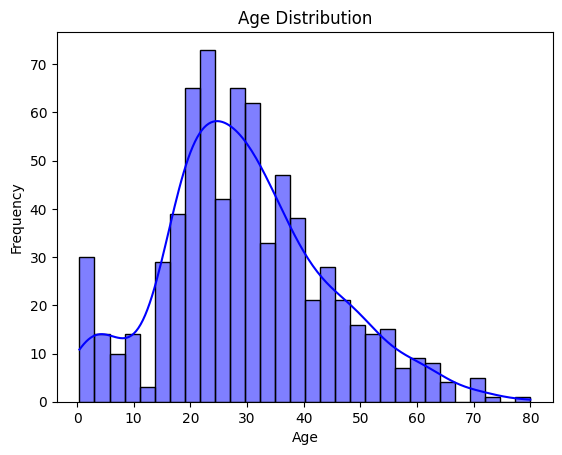

In [6]:
print(f"Mising value in Age: {df['Age'].isnull().sum()}")

#Vẽ biểu đồ phân phối tuổi (Age)
sns.histplot(df['Age'],kde=True, bins=30,color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [8]:
## Phân loại tuổi thành nhóm sau đó so sánh tỉ lệ sống sót giữa các nhóm

AgeGroup
Trẻ em              0.579710
Thanh thiếu niên    0.428571
Người lớn trẻ       0.355556
Trung niên          0.423237
Người già           0.343750
Name: Survived, dtype: float64


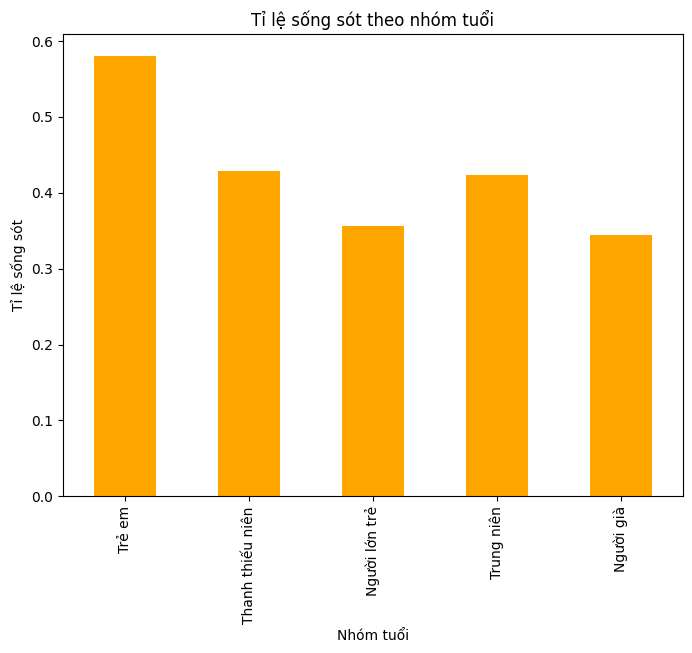

In [14]:
# Tạo các nhóm tuổi
bins = [0, 12, 18, 30, 50, 80] # Các nhóm: trẻ em, thanh thiếu niên, người lớn trẻ, trung niên, người già
labels = ['Trẻ em', 'Thanh thiếu niên', 'Người lớn trẻ','Trung niên','Người già']
df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels = labels)

# Kiểm tra tỷ lệ sống sót trong từng nhóm tuổi
age_survival = df.groupby('AgeGroup', observed=False)['Survived'].mean()
print(age_survival)

# Vẽ biểu đồ cột để so sánh tỷ lệ sống sót
age_survival.plot(kind='bar',color='orange',figsize=(8,6))
plt.title('Tỉ lệ sống sót theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Tỉ lệ sống sót')
plt.show()

In [30]:
# KIỂM ĐỊNH GIÁ TRỊ THỐNG KÊ 
#T-Test
from scipy.stats import ttest_ind

# Loại bỏ các giá trị bị thiếu trong cột Age
df_age_clean = df.dropna(subset=['Age'])

# Tách dữ liệu tuổi theo nhóm Survived
age_survived = df_age_clean[df_age_clean['Survived']==1]['Age']
age_not_survived = df_age_clean[df_age_clean['Survived']==0]['Age']

# Kiểm định T-test
t_stat, p_value = ttest_ind(age_survived, age_not_survived)
print(f"T-statistic: {t_stat}, P-value:{p_value}")
if p_value < 0.05: 
    print(f"Có sự khác biệt ý nghĩa giữa hai nhóm tuổi")
else:
    print(f"Không có sự khác biệt ý nghĩa giữa hai nhóm tuổi")

T-statistic: -2.06668694625381, P-value:0.03912465401348248
Có sự khác biệt ý nghĩa giữa hai nhóm tuổi


In [38]:
# KIỂM ĐỊNH GIÁ TRỊ THỐNG KÊ 
#Chi-Square Test
from scipy.stats import ttest_ind


# Tạo bảng tần suất giữa nhóm tuổi và sống sót
agegroup__survived_ct = pd.crosstab(df['AgeGroup'], df['Survived'])


# Kiểm định Chi-Square test
chi2, p, dof, expected = chi2_contingency(agegroup__survived_ct)
print(f"Chi-Square statistic: {chi2}, P-value:{p}")
if p < 0.05: 
    print(f"Có mối liên hệ giữa nhóm tuổi và khả năng sống sót.")
else:
    print(f"Không có mối liên hệ đáng kể nào")

NameError: name 'ch2_contingency' is not defined

In [8]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5,NaN,Q


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
df.pivot_table(values='value_col', index='index_col', columns='column_col', aggfunc='mean')

KeyError: 'value_col'